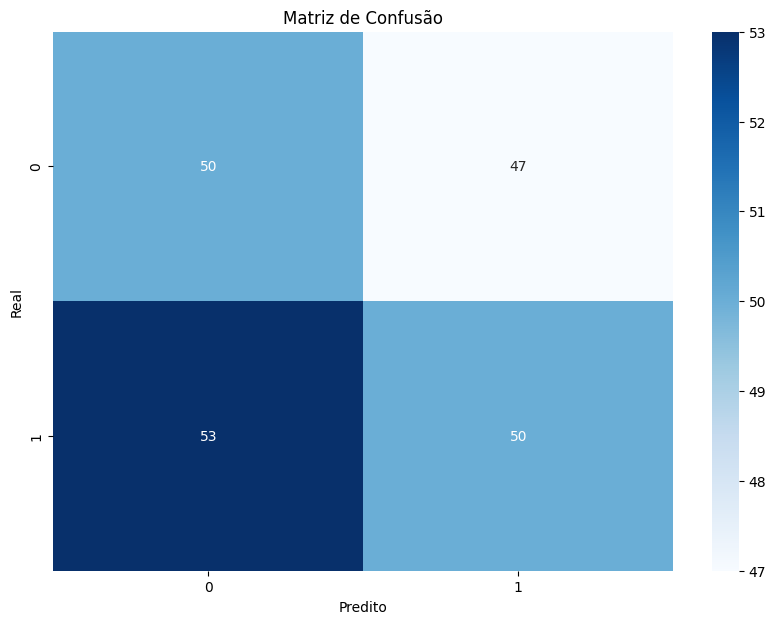

Acurácia: 50.00%
Precisão: 51.55%
Sensibilidade: 48.54%
Especificidade: 51.55%
F-score: 50.00%


In [81]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Criando um dataframe com dados aleatórios
np.random.seed(42)
data = {
    'coluna 1': np.random.randn(1000),
    'coluna 2': np.random.randn(1000),
    'coluna 3': np.random.randn(1000),
    'variavel resposta': np.random.randint(0, 2, 1000)
}
df = pd.DataFrame(data)

# Separando os dados e rodando o modeo de random forest
X = df.drop('variavel resposta', axis=True)
y = df['variavel resposta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# plotando heatmap para a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()

# Criando as classes da matriz
VN = matriz_confusao[0][0]
FP = matriz_confusao[0][1]
FN = matriz_confusao[1][0]
VP = matriz_confusao[1][1]
N = VP + FN + FP + VN

# Realizando os cálculo de métricas de avaliação de aprendizado conforme exercício
acuracia = (VP+VN)/ N
precisao = VP/ (VP + FP)
sensibilidade = VP/ (VP+FN)
especificidade = VN/ (FP+VN)
f1 = 2 * (precisao * sensibilidade)/ (precisao + sensibilidade)

# imprimindo resultados
print(f"Acurácia: {acuracia*100:.2f}%")
print(f"Precisão: {precisao*100:.2f}%")
print(f"Sensibilidade: {sensibilidade*100:.2f}%")
print(f"Especificidade: {especificidade*100:.2f}%")
print(f"F-score: {f1*100:.2f}%")